In [1]:
%load_ext autoreload
%autoreload 2

import glob
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm.notebook import tqdm
import torchvision.datasets as dset
import torchvision.transforms as transforms
from data import WasteSet, get_waste, standardize_inv
from utils import show_annotation, show_cmap
from PIL import Image
from torch.utils.data import DataLoader

data_path = '/dtu/datasets1/02514/data_wastedetection'

In [2]:
annotation_file = os.path.join(data_path, 'annotations.json')
with open(annotation_file, 'r') as f:
    annotation = json.loads(f.read())

annotation.keys(), annotation['annotations'][0].keys()

(dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories']),
 dict_keys(['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox', 'iscrowd']))

# Dataset unit tests

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


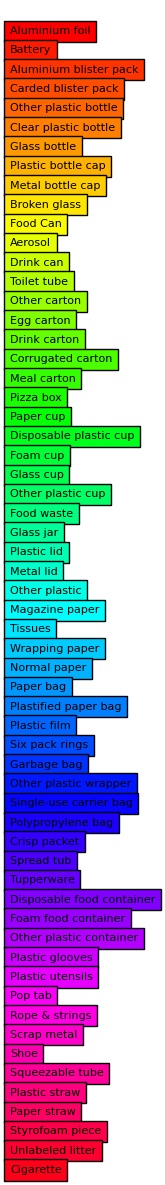

In [3]:
trainset = WasteSet(data_path, annotation_file, 'train', supercategories=False)
show_cmap(trainset.cat_names)

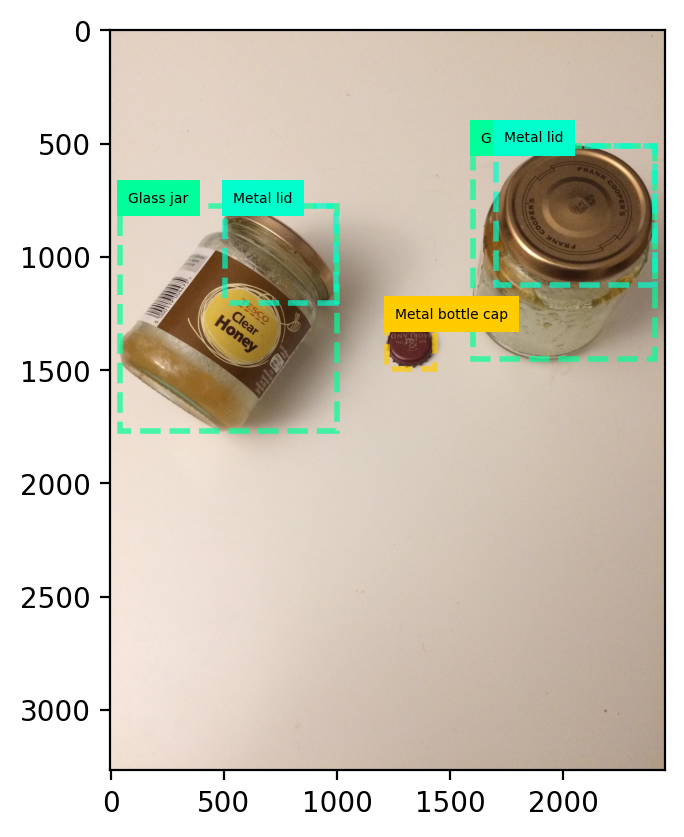

In [4]:
im, target = trainset[0]

fig, ax = plt.subplots(1, dpi=200)

ax.imshow(im)
show_annotation(target, ax, supercategories=False, names=trainset.cat_names)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
loading annotations into memory...
Done (t=0.27s)
creating index...
index created!


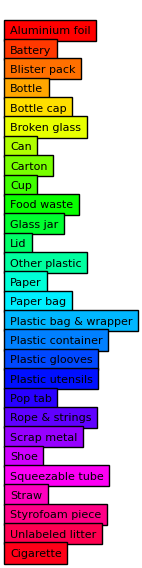

In [5]:
trainset = WasteSet(data_path, annotation_file, 'train', supercategories=True)
show_cmap(trainset.cat_names)

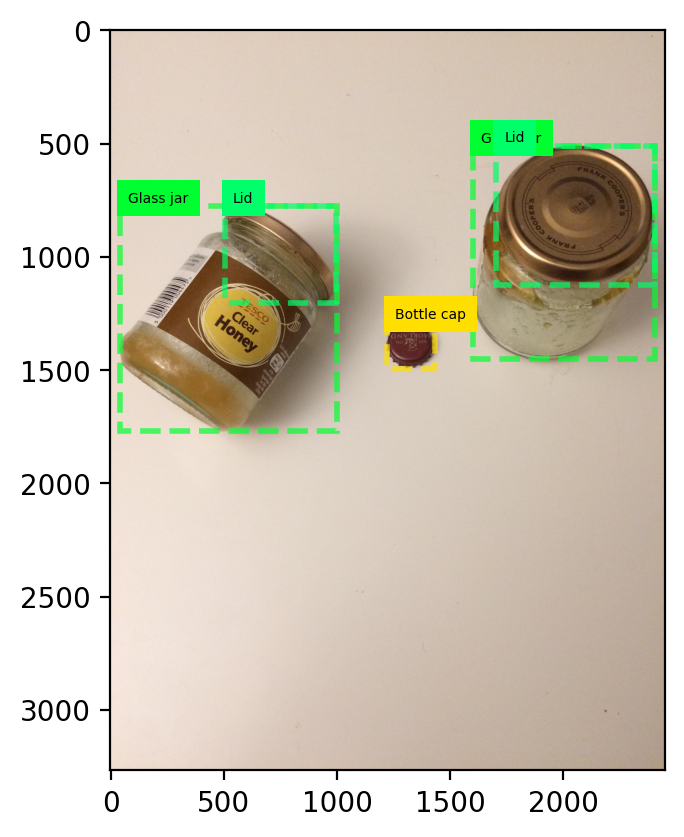

In [6]:
im, target = trainset[0]

fig, ax = plt.subplots(1, dpi=200)

ax.imshow(im)
show_annotation(target, ax, names=trainset.cat_names)

# Mean and std.

In [7]:
# transform = transforms.Compose([transforms.ToTensor()])
# trainset = WasteSet(data_path, annotation_file, 'train', transform=transform, supercategories=True)

# # This should be run where trainset is not standardized.
# im, label = trainset[0]
# channel_mean_sum = im.mean((1, 2))
# channel_std_sum = im.std((1, 2))
# for i in tqdm(range(1, len(trainset))):
#     im, label = trainset[i]
#     channel_mean_sum += im.mean((1, 2))
#     channel_std_sum += im.std((1, 2))

# channel_mean = channel_mean_sum / len(trainset)
# channel_std = channel_std_sum / len(trainset)
# channel_mean, channel_std

# Dataloader unit tests

In [46]:
train_dataset, val_dataset, test_dataset, train_loader, val_loader, test_loader = get_waste(8,
              num_workers=0,
              data_augmentation=True,
              supercategories=True)

len(train_dataset), len(val_dataset), len(test_dataset)

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
loading annotations into memory...
Done (t=0.32s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


(1050, 225, 225)

In [ ]:
im, target = train_dataset[0]
im, _ = standardize_inv(im, None)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(np.moveaxis(im.numpy(), 0, 2))
show_annotation(target, ax, names=train_dataset.cat_names)